<a href="https://colab.research.google.com/github/CristianMed25/MetNumUN2024I/blob/main/Lab2/crmedinab_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic

%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 35 µs, sys: 1 µs, total: 36 µs
Wall time: 39.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A,B):
    if len(A[0]) == len(B):
      out = [[0 for col in range(len(B[0]))] for row in range(len(A))]
      for i in range(len(A)):
          for j in range(len(B[0])):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
        return ("The matrices cannot be multiplied.")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a, b)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 8.58 µs


'The matrices cannot be multiplied.'

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a =[[23,8,12],
    [12,86,4],
    [85, 24, 16]]
b = [[1,0,43],
     [35,12,66],
     [65,3,21]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:

%%time
matmul(a,b)


CPU times: user 38 µs, sys: 1e+03 ns, total: 39 µs
Wall time: 42.7 µs


[[1083, 132, 1769], [3282, 1044, 6276], [1965, 336, 5575]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.1756757502831674

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.930468263459009, 0.43422436436793477, 0.7278231259055229],
 [0.43512727692620945, 0.28645216712526234, 0.537069991278861]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
%%time
matrix_1 = random_matrix(600, 100)
matrix_2 = random_matrix(100, 600)
result = matmul(matrix_1, matrix_2)

import time
run = 10
avg = 0
for i in range(run):
  start = time.process_time()
  result = matmul(matrix_1, matrix_2)
  end = time.process_time()
  print(end - start)
  avg += end - start
print("Avarage: ", avg/10)

8.69855980700001
9.914249918999985
8.852424058999986
9.048083449000018
8.267922298999991
9.038994664
9.058216566999988
9.011590641999987
8.20072776500001
9.029112201999993
Avarage:  8.911988137299996
CPU times: user 1min 37s, sys: 183 ms, total: 1min 37s
Wall time: 1min 42s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:

execution_time_data = {'Language': ['Python'], 'Average Seconds': [avg / 10]}
DF_execution_time_data = pd.DataFrame(execution_time_data)
display(DF_execution_time_data)

,Language,Average Seconds
0,Python,8.911988


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
matrix_a = np.array(matrix_1)
matrix_b = np.array(matrix_2)
avg = 0
for i in range(10):
  start = time.process_time()
  matrix3 = matrix_a@matrix_b
  end = time.process_time()
  avg += end - start
print("The average execution time is: ", avg/10)

The average execution time is:  0.006483129200003645


In [ ]:
DF_execution_time_data.loc[len(DF_execution_time_data.index)] = ['Numpy', avg/10]
display(DF_execution_time_data)

,Language,Average Seconds
0,Python,8.911988
1,Numpy,0.006483


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.23 s, sys: 22.1 ms, total: 9.26 s
Wall time: 9.45 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

The extension _fortran_magic_248071d21904f7af3108865aed4d99a2 is already loaded. To reload it, use:
  %fortran_config --clean-cache


In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.4 ms, sys: 999 µs, total: 13.4 ms
Wall time: 13.7 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 194 µs, sys: 0 ns, total: 194 µs
Wall time: 205 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
M_A = [[101, 303],
     [505, 707]]

M_B = [[202, 404],
     [606, 808]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:


%%fortran
subroutine fortran_matrix(A,B)
    real, dimension(2,2) :: A,B,result
    result = matmul(A, B)
end subroutine fortran_matrix

#Codigo tomado y modificado:: https://stackoverflow.com/questions/62437443/question-about-the-behavior-of-the-fortran-function-matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:

%%time
fortran_matrix(M_A,M_B)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 41.2 µs


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:

%%fortran
subroutine fortran_matrix(A,B)
    real, dimension(600,100) :: A
    real, dimension(100,600) :: B
    real, dimension(600,600) :: r
    r = matmul(A, B)
end subroutine fortran_matrix

#Codigo tomado y modificado: https://fortran-lang.org/learn/intrinsics/transform/

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
fortran_matrix(matrix_1, matrix_2)

CPU times: user 11.3 ms, sys: 997 µs, total: 12.3 ms
Wall time: 12.3 ms


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
avg = 0
for i in range(10):
  start = time.process_time()
  fortran_matrix(matrix_1,matrix_2)
  end = time.process_time()
  avg += end - start
avg = avg/10
print("The average execution time is: ", avg)


DF_execution_time_data.loc[len(DF_execution_time_data.index)] = ['FortranMagic', avg]
display(DF_execution_time_data)



The average execution time is:  0.010579720799998426


,Language,Average Seconds
0,Python,8.911988
1,Numpy,0.006483
2,FortranMagic,0.010580


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile test.f
        program TEST

          integer ::  x = 600
          integer ::  y = 100
          integer ::  z = 600

          real    :: T,inicio,final

          integer ::  r, i, j, k

          double precision, dimension (600,100) :: A
          double precision, dimension (100,600) :: B
          double precision, dimension (600,600) :: C

          do i = 1, x
              do j = 1, x
                A(i, j) = i+j * 0.1
              end do
          end do

          do i = 1, y
              do j = 1, z
                B(i, j) = i+j * 0.5
              end do
          end do

          T = 0.0

          do r = 1, 10

            call cpu_time(inicio)
            C = matmul(A, B)
            call cpu_time(final)
            T = T + (final-inicio)

          end do

          T = T/10.0

        PRINT *,T
        stop
        end


Overwriting test.f


Codigo tomado y modificado: https://fortran-lang.discourse.group/t/tips-to-make-this-toy-program-faster/803?page=2

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

!gfortran test.f -o test
!./test


   6.27090037E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
DF_execution_time_data.loc[len(DF_execution_time_data.index)] = ['Fortran', 0.000531439949]
display(DF_execution_time_data)


,Language,Average Seconds
0,Python,8.911988
1,Numpy,0.006483
2,FortranMagic,0.010580
3,Fortran,0.000531


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile temp.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
int count=10;
FILE *archivo;
  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }
  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }
  int Resultado[600][600];
    clock_t inicio,stop;
    double total=0.0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= (double) (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        printf("%f ", total);
    archivo = fopen("resultado.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);

}

Overwriting temp.c


Codigo tomado y modificado de: https://www.upgrad.com/tutorials/software-engineering/c-tutorial/matrix-multiplication-in-c/#:~:text=Step%2D1%3A%20Enter%20the%20value,in%20C%20using%20for%20loop.

**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc temp.c -o temp
!./temp

0.161378 

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
C = open("resultado.txt",'r')
avr_archivo = float(C.readline())
DF_execution_time_data.loc[len(DF_execution_time_data.index)] = ['C', avr_archivo]
display(DF_execution_time_data)

,Language,Average Seconds
0,Python,8.911988
1,Numpy,0.006483
2,FortranMagic,0.010580
3,Fortran,0.000531
4,C,0.161378


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile temp++.cc
#include <iostream>
#include <ctime>
using namespace std;
int main() {
int count=10;
FILE *archivo;
  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }
  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }
  int Resultado[600][600];
    unsigned inicio,stop;
    double total=0.0;
    int repeticion =0;
    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= double (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        cout << total << endl;
    archivo = fopen("cppresultado.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);
  return 0 ;
}

Overwriting temp++.cc


Codigo tomado y modificado de: https://www.geeksforgeeks.org/c-program-multiply-two-matrices/

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ temp++.cc -o temp++
!./temp++

0.162041


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
C_plus_plus = open("cppresultado.txt",'r')
avr_archivo = float(C_plus_plus.readline())
DF_execution_time_data.loc[len(DF_execution_time_data.index)] = ['C++', avr_archivo]
display(DF_execution_time_data)

,Language,Average Seconds
0,Python,8.911988
1,Numpy,0.006483
2,FortranMagic,0.010580
3,Fortran,0.000531
4,C,0.161378
5,C++,0.162041


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
import java.util.Arrays;
import java.util.Random;
class Main {

  public static void main(String[] args) {
    try{
      int[][] A=randomMatrix(600,100);
      int[][] B=randomMatrix(100,600);
      long timei = System.nanoTime();
      for(int i=0;i<10;i++){
        mulmat(A,B);
      }
      long timef = System.nanoTime();
      System.out.println("Average time in nanoSec: "+((timef - timei)/10));
    }catch(Exception e){
      System.out.println(e);
    }

  }
  public static int[][] randomMatrix(int x,int y){
    Random r=new Random();
    int[][] a=new int[x][y];
    for(int i=0;i<x;i++)
    {
        for(int j=0;j<y;j++)
        {
          a[i][j]=r.nextInt(20);
        }
    }
    return a;
  }
  public static void imp(int[][] matriz){
    for (int x=0; x < matriz.length; x++) {
  System.out.print("|");
  for (int y=0; y < matriz[x].length; y++) {
    System.out.print (matriz[x][y]);
    if (y!=matriz[x].length-1) System.out.print("\t");
  }
  System.out.println("|");
}
System.out.println("");
  }
  public static int[][] mulmat(int[][]A,int[][]B) throws Exception{
    int [] [] matrix = new int [A.length] [B[0].length];
    if(A[0].length==B.length){
      for(int i=0;i<A.length;i++){
        for(int j=0;j<B[0].length;j++){
          for(int k=0;k<B.length;k++){
            matrix[i][j]+=A[i][k]*B[k][j];
          }
        }
      }
    }else{
      throw new Exception("Number of columns of first matrix don't match with number of rows of second matrix");
    }
    return matrix;
  }
}

Overwriting Main.java


Codigo tomado y modificado de: https://www.programiz.com/java-programming/examples/multiply-matrix-function

**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmulJava.java
public class matmulJava {
    public static void main(String[] args) {

        int[][] A = new int[600][100];
        int[][] B = new int[100][600];
        int[][] C = new int[600][600];

        // Initialize matrices A and B
        for (int i = 0; i < 600; i++) {
            for (int j = 0; j < 100; j++) {
                A[i][j] = i * j;
            }
        }

        for (int i = 0; i < 100; i++) {
            for (int j = 0; j < 600; j++) {
                B[i][j] = i + j;
            }
        }

        for (int n=0; n < 10; n++){
          for (int i = 0; i < 600; i++) {
              for (int j = 0; j < 600; j++) {
                  C[i][j] = 0;
                  for (int k = 0; k < 100; k++) {
                      C[i][j] += A[i][k] * B[k][j];
                  }
              }
          }
        }
    }
}

Writing matmulJava.java


Codigo tomado y modificado de: https://www.programiz.com/java-programming/examples/multiply-matrix-function

**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
%%time
!javac matmulJava.java
!java matmulJava

CPU times: user 30.4 ms, sys: 3.04 ms, total: 33.4 ms
Wall time: 2.62 s


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
# Average execution time
ini = time.process_time()
!javac matmulJava.java
!java matmulJava
fin = time.process_time()
timeT = fin-ini

# Adding Java average execution time to the data frame
DF_execution_time_data.loc[len(DF_execution_time_data.index)] = ['Java', timeT]
display(DF_execution_time_data)

,Language,Average Seconds
0,Python,8.911988
1,Numpy,0.006483
2,FortranMagic,0.010580
3,Fortran,0.000531
4,C,0.161378
5,C++,0.162041
6,Java,0.022107


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%javascript
// Inicializar las matrices A y B
let A = [];
let B = [];
for (let i = 0; i < 100; i++) {
  A[i] = [];
  for (let j = 0; j < 600; j++) {
    A[i][j] = Math.random(); // llenar con valores aleatorios
  }
}
for (let i = 0; i < 600; i++) {
  B[i] = [];
  for (let j = 0; j < 100; j++) {
    B[i][j] = Math.random(); // llenar con valores aleatorios
  }
}

// Realizar la multiplicación de matrices 10 veces y medir el tiempo de ejecución
let tiempos = [];
for (let k = 0; k < 10; k++) {
  let inicio = performance.now();
  let C = [];
  for (let i = 0; i < 100; i++) {
    C[i] = [];
    for (let j = 0; j < 100; j++) {
      let sum = 0;
      for (let k = 0; k < 600; k++) {
        sum += A[i][k] * B[k][j];
      }
      C[i][j] = sum;
    }
  }
  let fin = performance.now();
  tiempos.push(fin - inicio);
}

// Calcular el promedio del tiempo de ejecución
let promedioTiempo = tiempos.reduce((a, b) => a + b) / tiempos.length;

// Imprimir el promedio del tiempo de ejecución en la consola
console.log(promedioTiempo);

<IPython.core.display.Javascript object>

Codigo tomado y modificado de: https://stackoverflow.com/questions/27205018/multiply-2-matrices-in-javascript

**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
avg=0.0105

DF_execution_time_data.loc[len(DF_execution_time_data.index)] = ['Javascript', avg]
display(DF_execution_time_data)

,Language,Average Seconds
0,Python,8.911988
1,Numpy,0.006483
2,FortranMagic,0.010580
3,Fortran,0.000531
4,C,0.161378
5,C++,0.162041
6,Java,0.022107
7,Javascript,0.010500


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min_execution_time = DF_execution_time_data['Average Seconds'].min()

print("minimun average esecuiton time in the data frame ", min_execution_time)

minimun average esecuiton time in the data frame  0.000531439949


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
DF_execution_time_data['Average Seconds'] =DF_execution_time_data['Average Seconds'].apply(lambda x: float(x))

minTime=DF_execution_time_data['Average Seconds'].min()

DF_execution_time_data['Speed Factor']=(DF_execution_time_data['Average Seconds']/minTime)

DF_execution_time_data

,Language,Average Seconds,Speed Factor
0,Python,8.911988,16769.511126
1,Numpy,0.006483,12.199175
2,FortranMagic,0.010580,19.907651
3,Fortran,0.000531,1.000000
4,C,0.161378,303.661778
5,C++,0.162041,304.909332
6,Java,0.022107,41.598939
7,Javascript,0.010500,19.757642


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
sorted_df = DF_execution_time_data.sort_values(by='Average Seconds')
sorted_df

,Language,Average Seconds,Speed Factor
3,Fortran,0.000531,1.000000
1,Numpy,0.006483,12.199175
7,Javascript,0.010500,19.757642
2,FortranMagic,0.010580,19.907651
6,Java,0.022107,41.598939
4,C,0.161378,303.661778
5,C++,0.162041,304.909332
0,Python,8.911988,16769.511126


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.42 ms, sys: 5 µs, total: 1.42 ms
Wall time: 1.43 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 3.21 ms, sys: 2.02 ms, total: 5.23 ms
Wall time: 6.95 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 172 µs, sys: 0 ns, total: 172 µs
Wall time: 176 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0443903273660313

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: [Errno 2] No such file or directory: 'AAPL.csv'

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

NameError: name 'aapl' is not defined

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

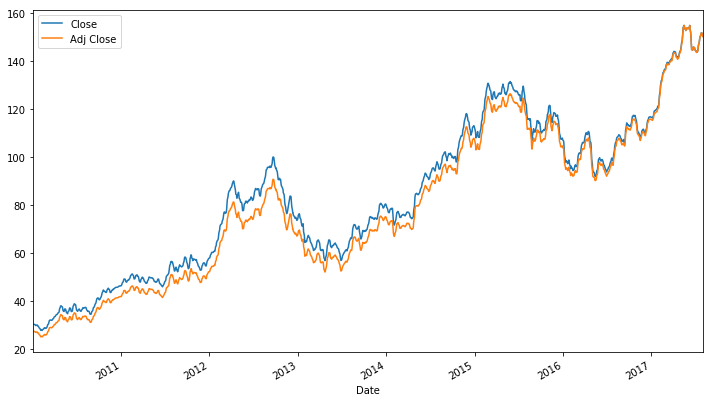

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

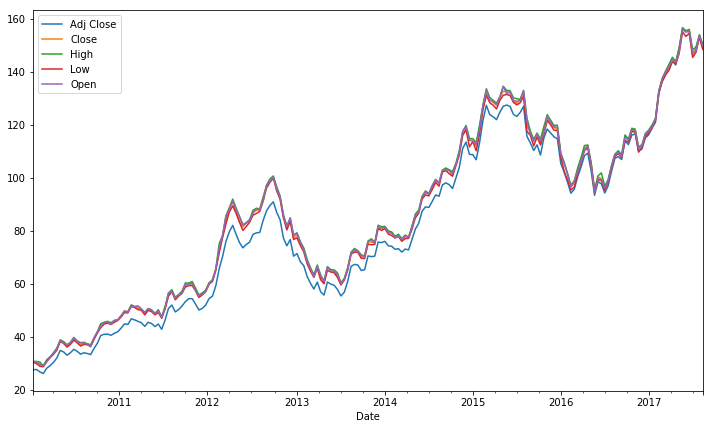

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

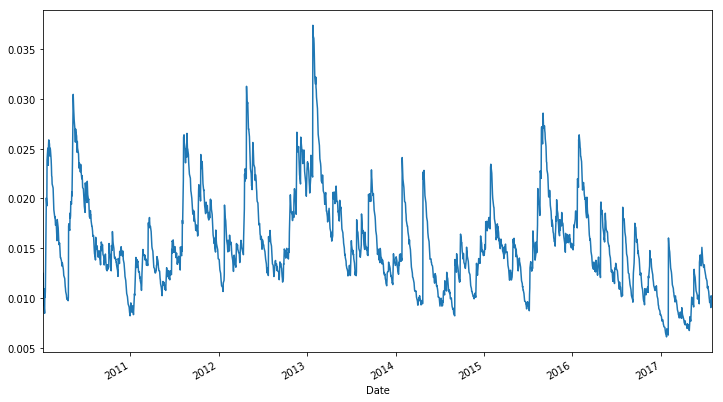

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-7-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

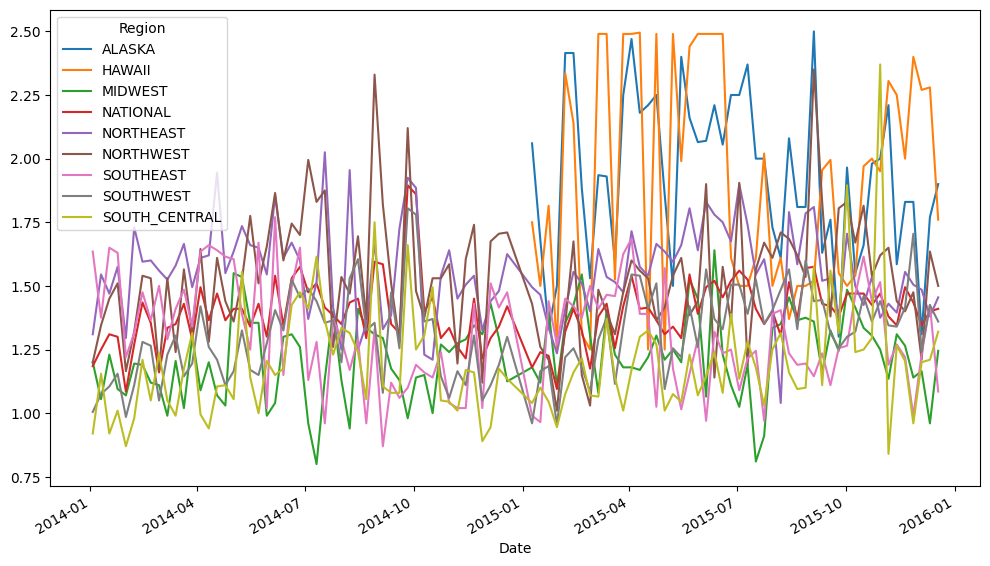

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

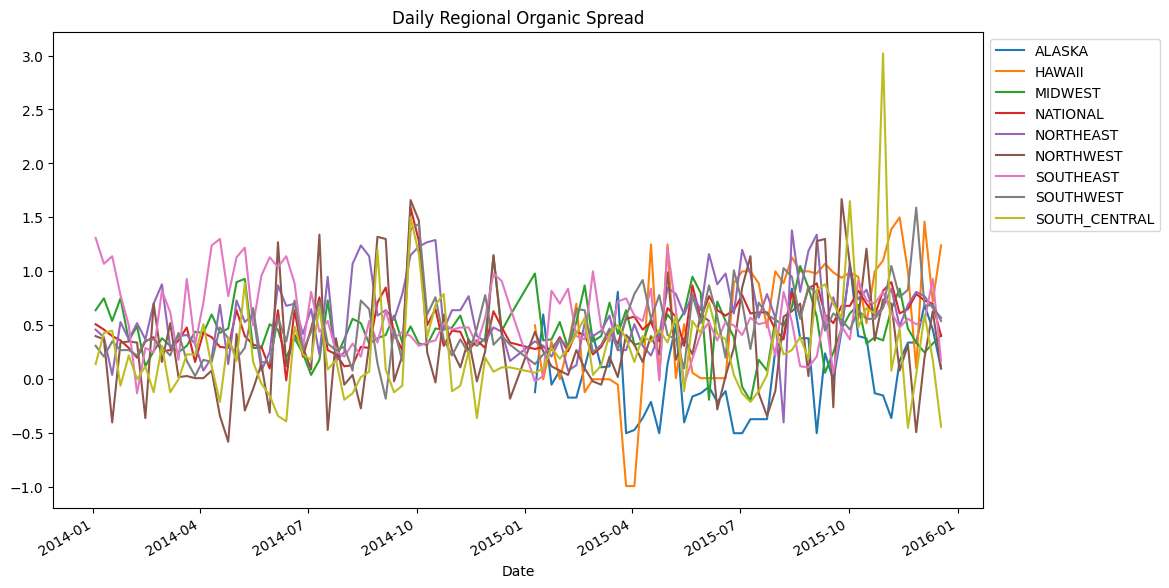

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


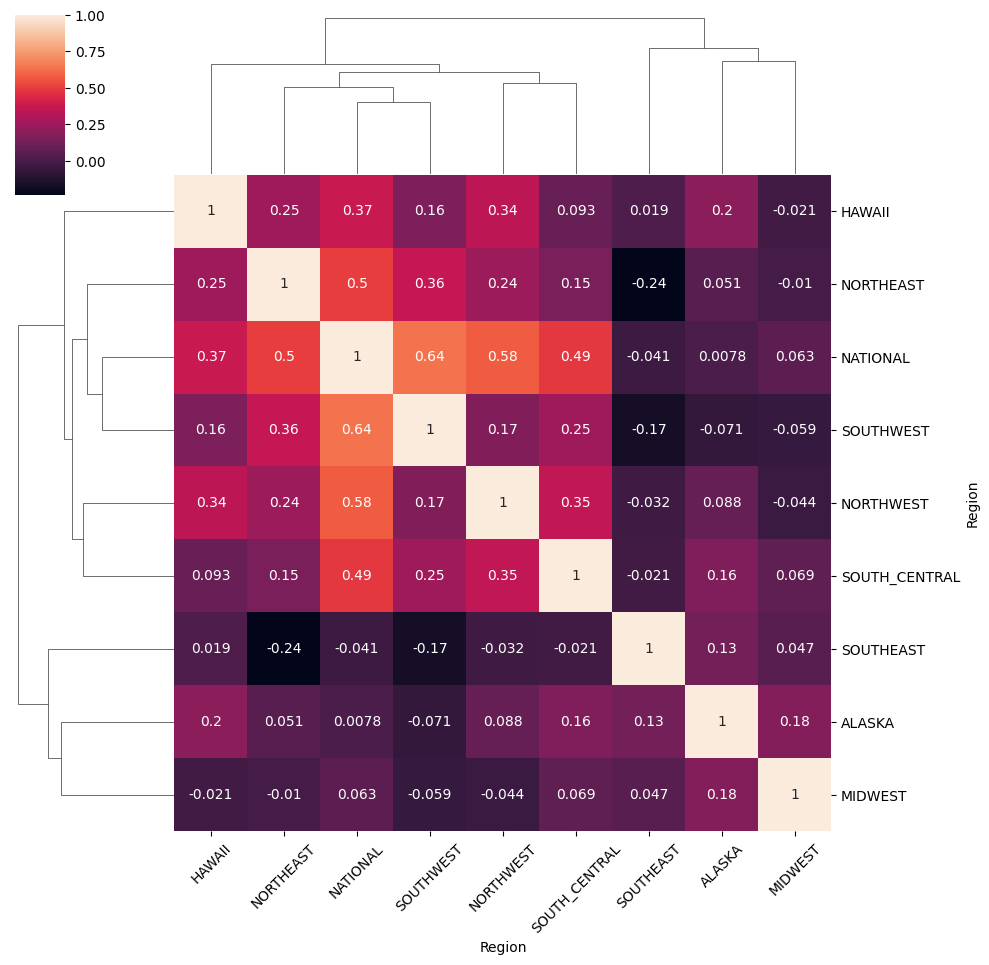

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# **MY OWN EXAMPLE**

In [1]:
## Needed Libraries.
from urllib.parse import urlencode
import pandas as pd
import requests

## Request data from url
resp = requests.get('https://www.datos.gov.co/resource/8hqm-7fdt.json')

data = resp.json()

tabla = pd.DataFrame(data)

#The following data represent a sample of the total population stored in
#the database, consisting of 189,000 entries. This specific sample covers
#1,000 cases of missing persons during the period June 2006 to June 2007.

In [ ]:
display(tabla)

,id,estado_de_la_desaparici_n,clasificaci_n_de_la_desaparici,fecha_de_la_desaparici_n,edad_al_momento_de_la,sexo_del_desaparecido,pa_s_de_nacimiento_del,ancestro_racial_del,estado_civil_del_desaparecido,escolaridad_del_desaparecido,pertenencia_grupal,pa_s_donde_ocurre_la,municipio_donde_ocurre_la,departamento_donde_ocurre,contexto
0,1,Desaparecido,Sin Información,2006-12-29T00:00:00.000,21,Hombre,Sin Información,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
1,2,Desaparecido,Sin Información,2006-12-26T00:00:00.000,24,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
2,3,Desaparecido,Sin Información,2006-12-29T00:00:00.000,13,Mujer,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
3,4,Aparecio Muerto,Sin Información,2006-12-31T00:00:00.000,50,Hombre,Colombia,Blanco,Soltero (a),Educación básica primaria,Persona adicta a una droga natural o sintética,Colombia,Cali,Valle Del Cauca,Desaparición
4,5,Aparecio Vivo,Sin Información,2006-12-29T00:00:00.000,17,Mujer,Sin Información,Mestizo,Soltero (a),Educación técnica profesional y tecnológica,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aparecio Vivo,Sin Información,2007-03-24T00:00:00.000,33,Hombre,Sin Información,Mestizo,Soltero (a),Educación básica primaria,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
996,997,Desaparecido,Sin Información,2007-03-23T00:00:00.000,24,Mujer,Sin Información,Mestizo,Soltero (a),Educación básica primaria,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
997,998,Aparecio Vivo,Sin Información,2007-03-26T00:00:00.000,17,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Soacha,Cundinamarca,Desaparición
998,999,Desaparecido,Sin Información,2007-03-09T00:00:00.000,14,Mujer,Colombia,Mestizo,Sin Información,Educación básica primaria,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición


In [ ]:
tabla.dtypes

id                                object
estado_de_la_desaparici_n         object
clasificaci_n_de_la_desaparici    object
fecha_de_la_desaparici_n          object
edad_al_momento_de_la             object
sexo_del_desaparecido             object
pa_s_de_nacimiento_del            object
ancestro_racial_del               object
estado_civil_del_desaparecido     object
escolaridad_del_desaparecido      object
pertenencia_grupal                object
pa_s_donde_ocurre_la              object
municipio_donde_ocurre_la         object
departamento_donde_ocurre         object
contexto                          object
dtype: object

In [ ]:
mujeresDesaparecidas = tabla.loc[tabla['sexo_del_desaparecido'] == 'Mujer']
display(mujeresDesaparecidas)

,id,estado_de_la_desaparici_n,clasificaci_n_de_la_desaparici,fecha_de_la_desaparici_n,edad_al_momento_de_la,sexo_del_desaparecido,pa_s_de_nacimiento_del,ancestro_racial_del,estado_civil_del_desaparecido,escolaridad_del_desaparecido,pertenencia_grupal,pa_s_donde_ocurre_la,municipio_donde_ocurre_la,departamento_donde_ocurre,contexto
2,3,Desaparecido,Sin Información,2006-12-29T00:00:00.000,13,Mujer,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
4,5,Aparecio Vivo,Sin Información,2006-12-29T00:00:00.000,17,Mujer,Sin Información,Mestizo,Soltero (a),Educación técnica profesional y tecnológica,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
5,6,Aparecio Muerto,Sin Información,2006-12-31T00:00:00.000,41,Mujer,Colombia,Mestizo,Unión Libre,Educación media o secundaria alta,Persona adicta a una droga natural o sintética,Colombia,Cali,Valle Del Cauca,Desaparición
8,9,Desaparecido,Sin Información,2007-01-01T00:00:00.000,20,Mujer,Colombia,Mestizo,Soltero (a),Educación básica primaria,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
11,12,Desaparecido,Sin Información,2006-12-31T00:00:00.000,15,Mujer,Colombia,Mestizo,Soltero (a),Educación media o secundaria alta,Otro,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,Desaparecido,Sin Información,2007-03-21T00:00:00.000,13,Mujer,Colombia,Mestizo,Soltero (a),Sin escolaridad,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
993,994,Desaparecido,Sin Información,2007-03-23T00:00:00.000,16,Mujer,Colombia,Mestizo,Soltero (a),Educación básica primaria,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
996,997,Desaparecido,Sin Información,2007-03-23T00:00:00.000,24,Mujer,Sin Información,Mestizo,Soltero (a),Educación básica primaria,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
998,999,Desaparecido,Sin Información,2007-03-09T00:00:00.000,14,Mujer,Colombia,Mestizo,Sin Información,Educación básica primaria,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición


In [ ]:
hombresDesaparecidos = tabla.loc[tabla['sexo_del_desaparecido'] == 'Hombre']
display(hombresDesaparecidos)

,id,estado_de_la_desaparici_n,clasificaci_n_de_la_desaparici,fecha_de_la_desaparici_n,edad_al_momento_de_la,sexo_del_desaparecido,pa_s_de_nacimiento_del,ancestro_racial_del,estado_civil_del_desaparecido,escolaridad_del_desaparecido,pertenencia_grupal,pa_s_donde_ocurre_la,municipio_donde_ocurre_la,departamento_donde_ocurre,contexto
0,1,Desaparecido,Sin Información,2006-12-29T00:00:00.000,21,Hombre,Sin Información,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
1,2,Desaparecido,Sin Información,2006-12-26T00:00:00.000,24,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
3,4,Aparecio Muerto,Sin Información,2006-12-31T00:00:00.000,50,Hombre,Colombia,Blanco,Soltero (a),Educación básica primaria,Persona adicta a una droga natural o sintética,Colombia,Cali,Valle Del Cauca,Desaparición
6,7,Aparecio Vivo,Sin Información,2006-12-31T00:00:00.000,71,Hombre,Colombia,Mestizo,Unión Libre,Educación básica primaria,Otro,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
7,8,Aparecio Muerto,Sin Información,2006-12-30T00:00:00.000,25,Hombre,Colombia,Blanco,Soltero (a),Educación básica primaria,Ninguno,Colombia,Cali,Valle Del Cauca,Desaparición
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Desaparecido,Sin Información,2007-03-19T00:00:00.000,35,Hombre,Sin Información,Mestizo,Casado (a),Educación media o secundaria alta,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
992,993,Desaparecido,Sin Información,2007-03-24T00:00:00.000,21,Hombre,Colombia,Mestizo,Unión Libre,Educación básica primaria,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
994,995,Aparecio Muerto,Sin Información,2007-02-26T00:00:00.000,29,Hombre,Sin Información,Negro,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Cali,Valle Del Cauca,Desaparición
995,996,Aparecio Vivo,Sin Información,2007-03-24T00:00:00.000,33,Hombre,Sin Información,Mestizo,Soltero (a),Educación básica primaria,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición


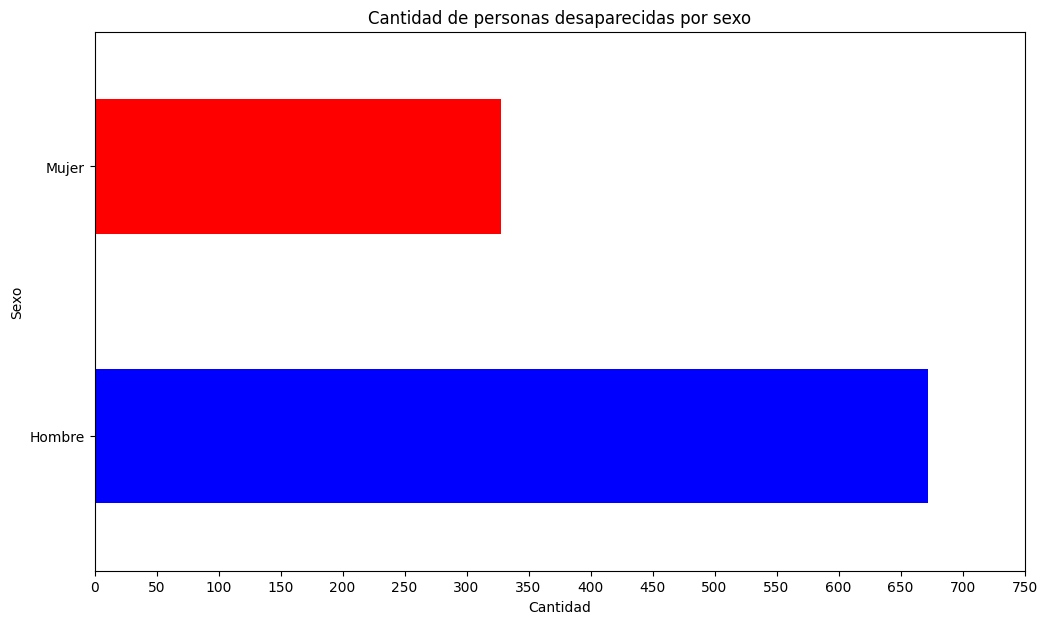

In [ ]:
import matplotlib.pyplot as plt

colores = ['blue', 'red']

sexo = tabla.groupby('sexo_del_desaparecido')['id'].count()
sexo.plot(kind='barh', color=colores)
plt.title('Cantidad de personas desaparecidas por sexo')
plt.xlabel('Cantidad')
plt.ylabel('Sexo')

plt.xticks(range(0, 800, 50))

plt.show()

<ipython-input-53-b31b0265d955>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coloresMatPlot = plt.cm.get_cmap('tab20').colors


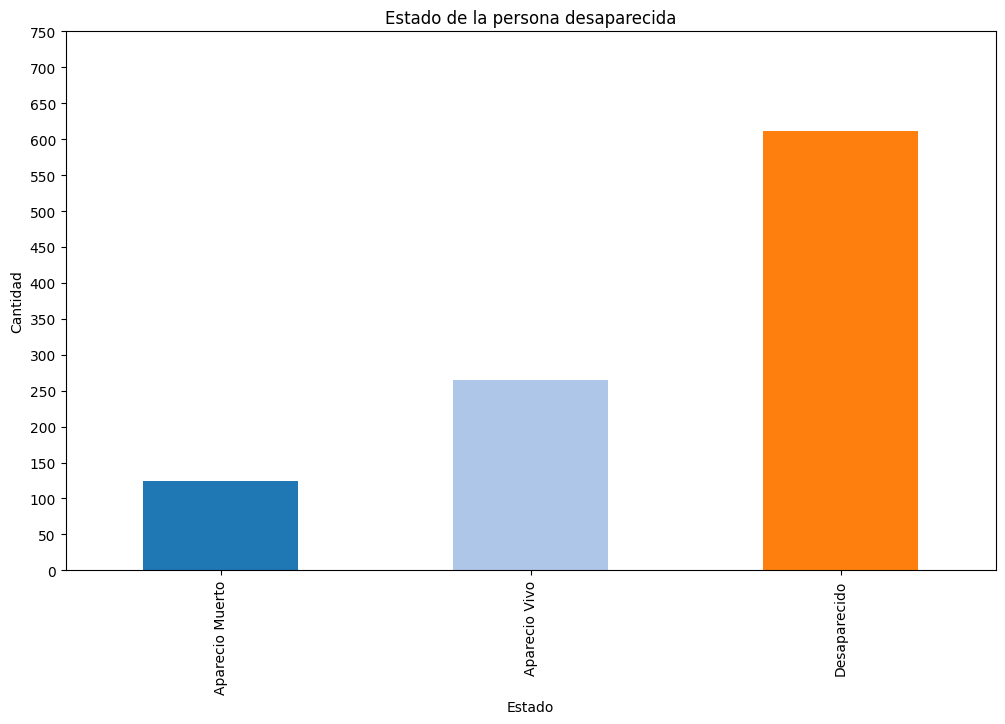

In [ ]:
departamento = tabla.groupby('estado_de_la_desaparici_n')['id'].count()

coloresMatPlot = plt.cm.get_cmap('tab20').colors
colores = coloresMatPlot[:21]

departamento.plot(kind='bar', color=colores)
plt.title('Estado de la persona desaparecida')
plt.xlabel('Estado')
plt.ylabel('Cantidad')

plt.yticks(range(0, 800, 50))

plt.show()

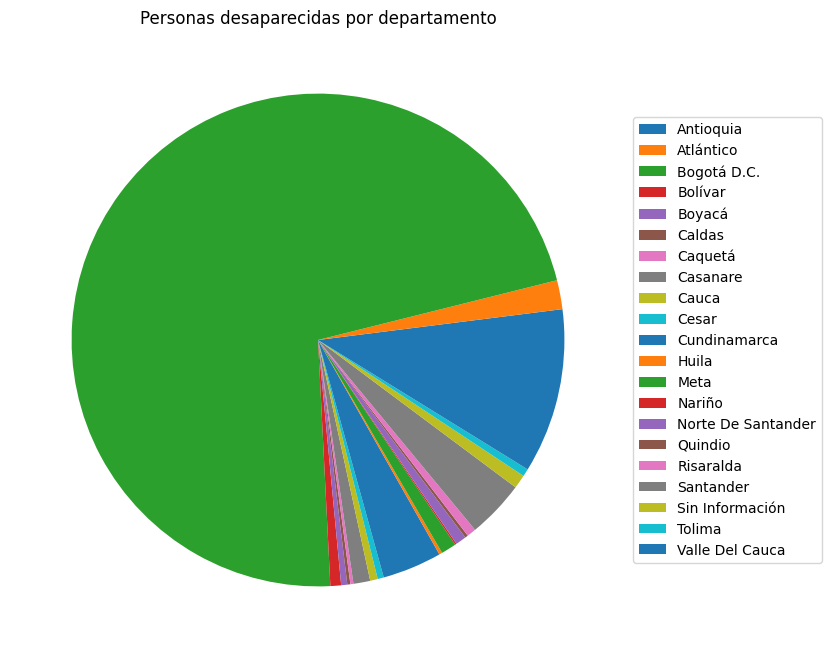

In [ ]:
departamento = tabla.groupby('departamento_donde_ocurre')['id'].count()

# Crear el diagrama de pie
plt.figure(figsize=(8, 8))
pie_chart = plt.pie(departamento, labels=None)

# Mostrar las etiquetas aparte utilizando legend()
plt.legend(departamento.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Personas desaparecidas por departamento')

plt.show()

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!